In [2]:
from mpl_toolkits import mplot3d
import math

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

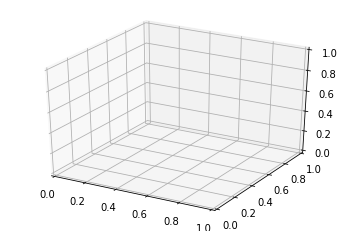

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

M: [[3.]
 [0.]
 [0.]]


Text(3.0, 0.0, 'M(3.00, 0.00, 0.00)')

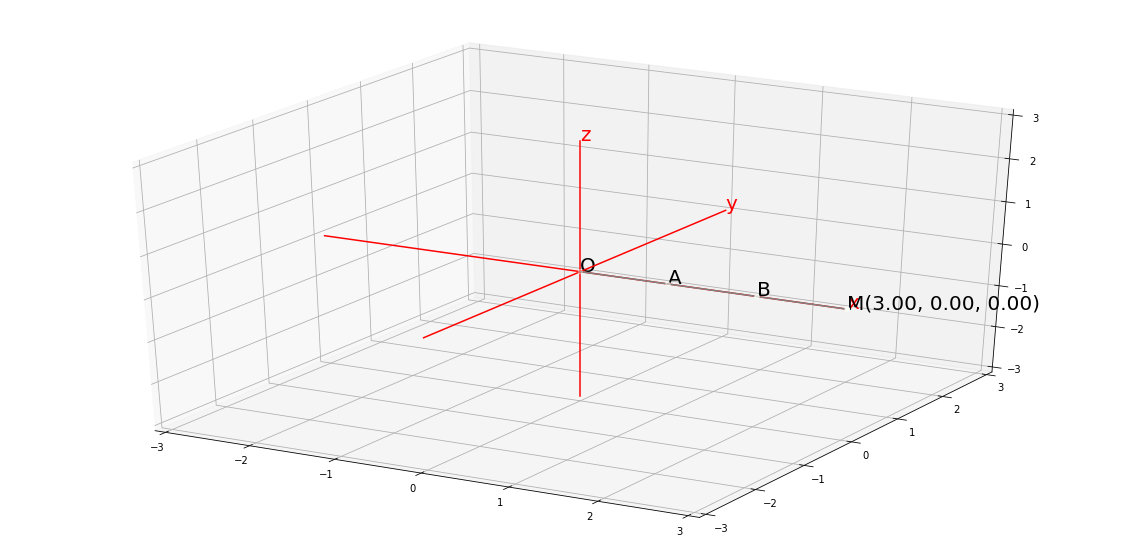

In [39]:
T0 = 0
T1 = np.pi
T2 = np.pi

l0 = l1 = l2 = 1

O = np.array([[0], [0], [0]])
#print("O:", O)

A = np.array([[l0 * math.cos(T0)], [l0 * math.sin(T0)], [0]]) + O
#print("A:", A)

def rotationZ(t):
    return np.array([[np.cos(t), -np.sin(t), 0], [np.sin(t), np.cos(t), 0],[0, 0, 1]])

B = np.dot(rotationZ(T0), np.array([[l1 * np.cos(np.pi - T1)], [0], [l1 * np.sin(np.pi - T1)]])) + A
#print("B:", B)

def rotationY(t):
    return np.array([[np.cos(t), 0, np.sin(t)], [0, 1, 0],[-np.sin(t), 0, np.cos(t)]])

M = np.dot(rotationZ(T0), np.dot(rotationY(np.pi-T1), np.array([[l2 * np.cos(np.pi - T2)], [0], [l2 * np.sin(np.pi - T2)]]))) + B
print("M:", M)

points = [O, A, B, M]

X, Y, Z = np.zeros(4), np.zeros(4), np.zeros(4)
for i in range(len(points)):
    X[i] = points[i][0]
    Y[i] = points[i][1]
    Z[i] = points[i][2]

# Figure
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

# Limites
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

# Axes
ax.plot3D([-3, 3], [0, 0], [0, 0], color='red')
ax.plot3D([0, 0], [-3, 3], [0, 0], color='red')
ax.plot3D([0, 0], [0, 0], [-3, 3], color='red')

# Bras
ax.plot3D(X, Y, Z, 'gray')
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens', marker='o')

# Labels
ax.text(3, 0, 0, 'x', size=20, zorder=1, color='r')
ax.text(0, 3, 0, 'y', size=20, zorder=1, color='r')
ax.text(0, 0, 3, 'z', size=20, zorder=1, color='r')
ax.text(X[0], Y[0], Z[0], 'O', size=20, zorder=1, color='k')
ax.text(X[1], Y[1], Z[1], 'A', size=20, zorder=1, color='k')
ax.text(X[2], Y[2], Z[2], 'B', size=20, zorder=1, color='k')
ax.text(X[3], Y[3], Z[3], 'M(%.2f, %.2f, %.2f)' % (X[3], Y[3], Z[3]), size=20, zorder=1, color='k')
